## <font size=5> <strong>Heart Disease Prediction 
 

## I. Importing essential libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.ipynb_checkpoints', 'heart.csv', 'Heart_disease_prediction.ipynb', 'README.md']


## II. Importing and understanding our dataset 

In [5]:
dataset = pd.read_csv("heart.csv")

#### Verifying it as a 'dataframe' object in pandas

In [7]:
type(dataset)

pandas.core.frame.DataFrame

#### Shape of dataset

In [26]:
dataset.shape

(303, 14)

#### Printing out a few columns

In [29]:
dataset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [31]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
147,60,0,3,150,240,0,1,171,0,0.9,2,0,2,1
254,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0
210,57,1,2,128,229,0,0,150,0,0.4,1,1,3,0
112,64,0,2,140,313,0,1,133,0,0.2,2,0,3,1
32,44,1,1,130,219,0,0,188,0,0.0,2,0,2,1


#### Description

In [34]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [38]:
###Luckily, we have no missing values

#### Let's understand our columns better:

In [41]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


#### Analysing the 'target' variable

In [44]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [46]:
dataset["target"].unique()

array([1, 0], dtype=int64)

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [50]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

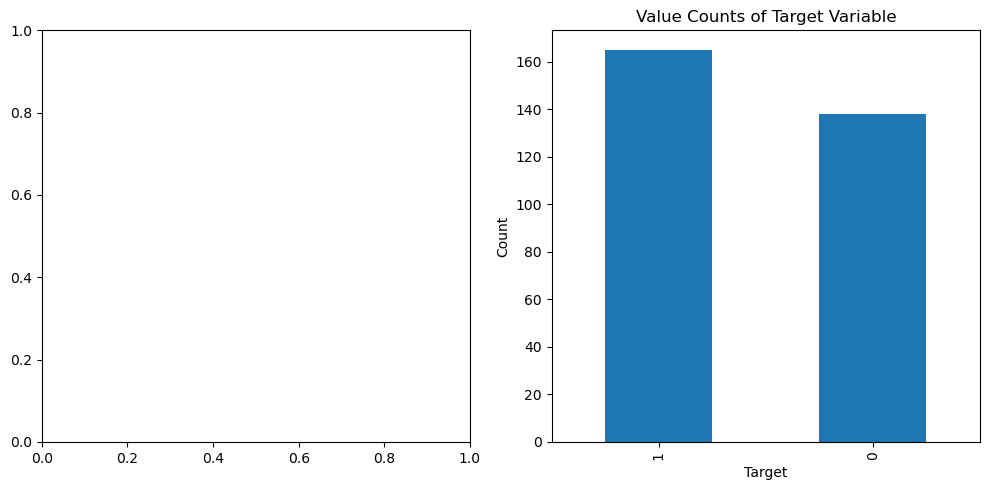

In [55]:


# Assuming `dataset` is your DataFrame and 'target' is the column you are interested in
y = dataset["target"]

# Create a figure with 1 row and 2 columns of subplots
fig, axes = plt.subplots(1,2, figsize=(10, 5))

# Plot the value counts of the target variable
target_counts = y.value_counts()
target_counts.plot(kind='bar', ax=axes[1])
axes[1].set_title('Value Counts of Target Variable')
axes[1].set_xlabel('Target')
axes[1].set_ylabel('Count')

# Adjust the layout
plt.tight_layout()
plt.show()


In [56]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

#Alternatively,
# print("Percentage of patience with heart problems: "+str(y.where(y==1).count()*100/303))
# print("Percentage of patience with heart problems: "+str(y.where(y==0).count()*100/303))

# #Or,
# countNoDisease = len(df[df.target == 0])
# countHaveDisease = len(df[df.target == 1])

NameError: name 'target_temp' is not defined

### We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

### Analysing the 'Sex' feature

In [ ]:
dataset["sex"].unique()

##### We notice, that as expected, the 'sex' feature has 2 unique features

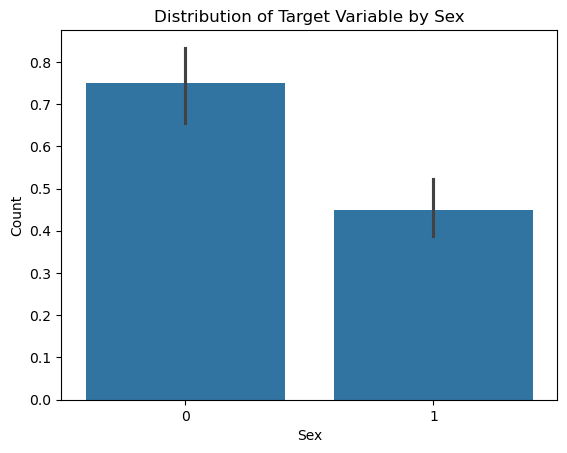

In [59]:
#sns.barplot(dataset["sex"],y)

sns.barplot(x=dataset["sex"], y=y)
plt.title('Distribution of Target Variable by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

##### We notice, that females are more likely to have heart problems than males

### Analysing the 'Chest Pain Type' feature

In [63]:
dataset["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

##### As expected, the CP feature has values from 0 to 3

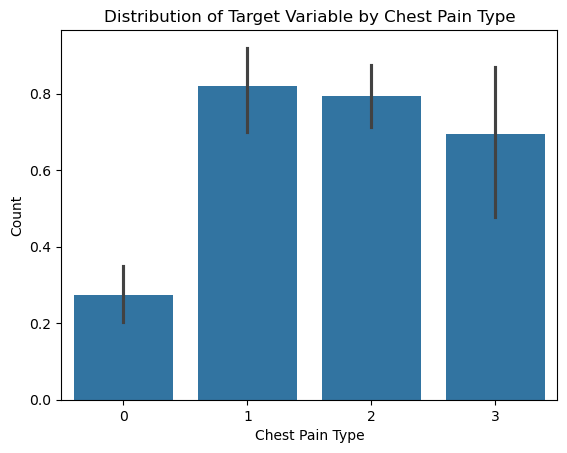

In [66]:
#sns.barplot(dataset["cp"],y)
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'dataset' is your DataFrame and 'cp' is another categorical variable
sns.barplot(x=dataset["cp"], y=y)
plt.title('Distribution of Target Variable by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

##### We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

### Analysing the FBS feature

In [70]:
dataset["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [72]:
dataset["fbs"].unique()

array([1, 0], dtype=int64)

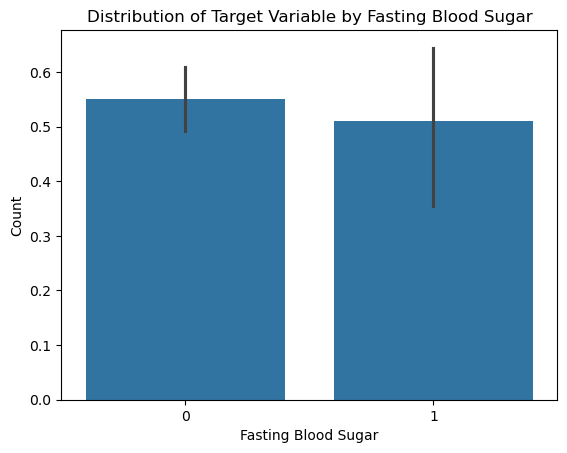

In [74]:
#sns.barplot(dataset["fbs"],y)

sns.barplot(x=dataset["fbs"], y=y)
plt.title('Distribution of Target Variable by Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Count')
plt.show()

##### Nothing extraordinary here

### Analysing the restecg feature

In [78]:
dataset["restecg"].unique()

array([0, 1, 2], dtype=int64)

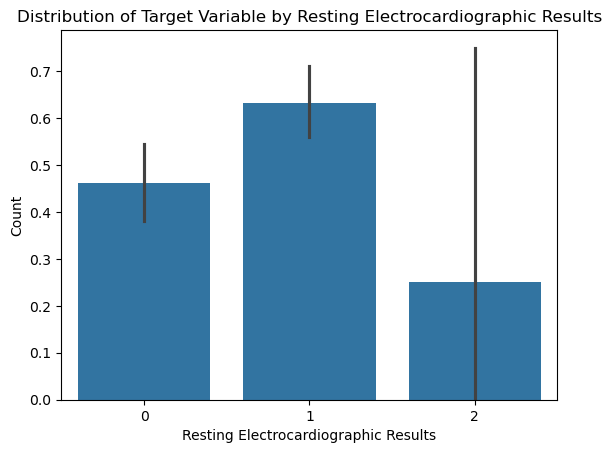

In [80]:
#sns.barplot(dataset["restecg"],y)

sns.barplot(x=dataset["restecg"], y=y)
plt.title('Distribution of Target Variable by Resting Electrocardiographic Results')
plt.xlabel('Resting Electrocardiographic Results')
plt.ylabel('Count')
plt.show()

##### We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

### Analysing the 'exang' feature

In [84]:
dataset["exang"].unique()

array([0, 1], dtype=int64)

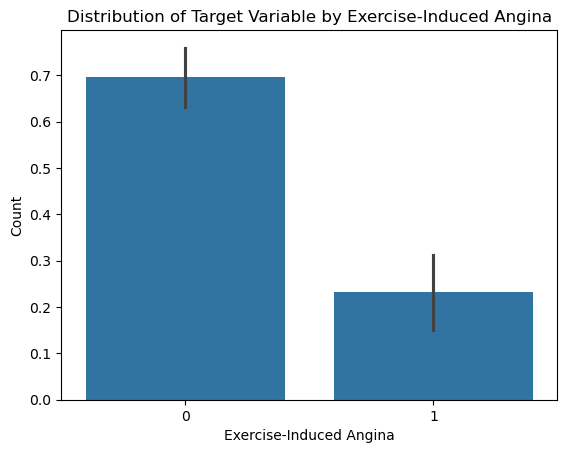

In [86]:
#sns.barplot(dataset["exang"],y)

sns.barplot(x=dataset["exang"], y=y)
plt.title('Distribution of Target Variable by Exercise-Induced Angina')
plt.xlabel('Exercise-Induced Angina')
plt.ylabel('Count')
plt.show()

##### People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

### Analysing the Slope feature

In [90]:
dataset["slope"].unique()

array([0, 2, 1], dtype=int64)

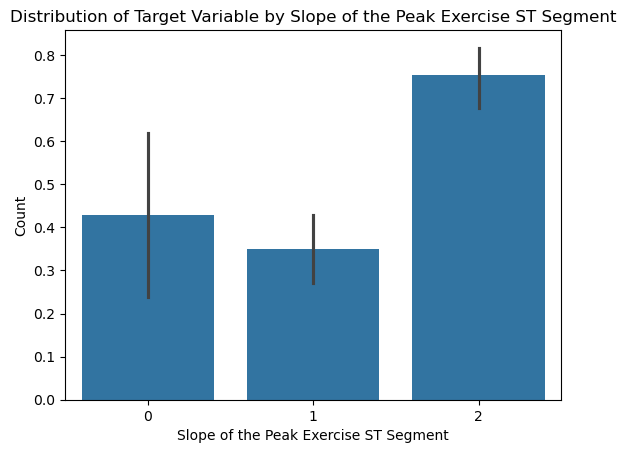

In [92]:
#sns.barplot(dataset["slope"],y)

sns.barplot(x=dataset["slope"], y=y)
plt.title('Distribution of Target Variable by Slope of the Peak Exercise ST Segment')
plt.xlabel('Slope of the Peak Exercise ST Segment')
plt.ylabel('Count')
plt.show()

##### We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

### Analysing the 'ca' feature

In [96]:
#number of major vessels (0-3) colored by flourosopy

In [98]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

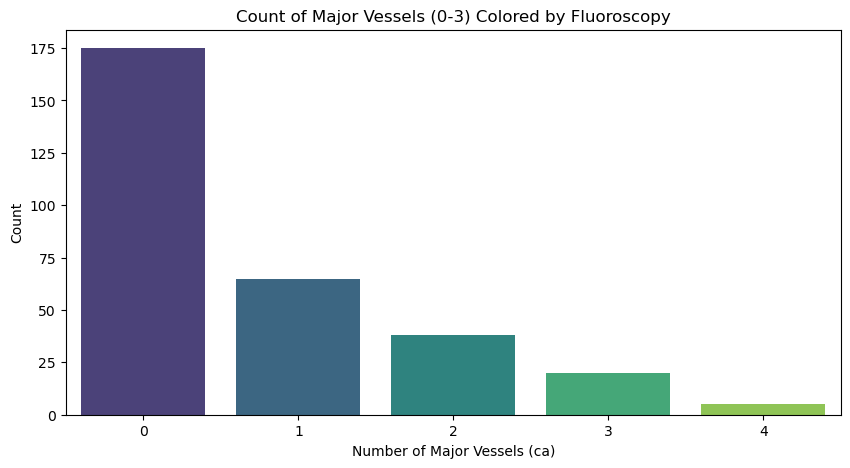

In [100]:
plt.figure(figsize=(10, 5))
palette = sns.color_palette("viridis", len(dataset["ca"].unique()))  # Use the 'viridis' colormap

sns.countplot(x="ca", data=dataset, palette=palette)
plt.title('Count of Major Vessels (0-3) Colored by Fluoroscopy')
plt.xlabel('Number of Major Vessels (ca)')
plt.ylabel('Count')

plt.show()

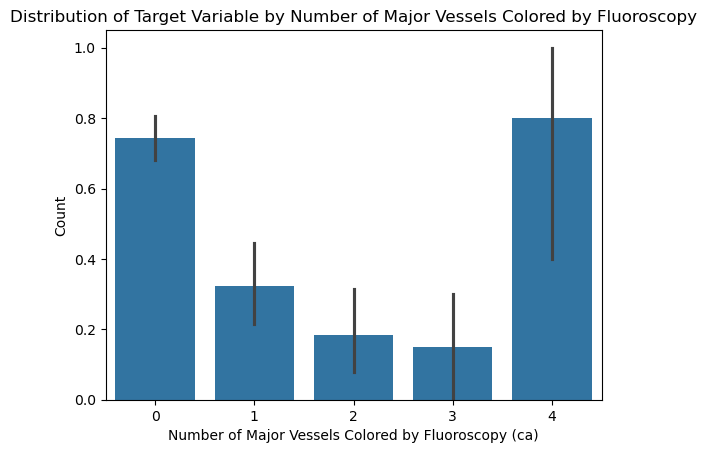

In [101]:
#sns.barplot(dataset["ca"],y)

sns.barplot(x=dataset["ca"], y=y)
plt.title('Distribution of Target Variable by Number of Major Vessels Colored by Fluoroscopy')
plt.xlabel('Number of Major Vessels Colored by Fluoroscopy (ca)')
plt.ylabel('Count')
plt.show()

##### ca=4 has astonishingly large number of heart patients

In [104]:
### Analysing the 'thal' feature

In [105]:
dataset["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

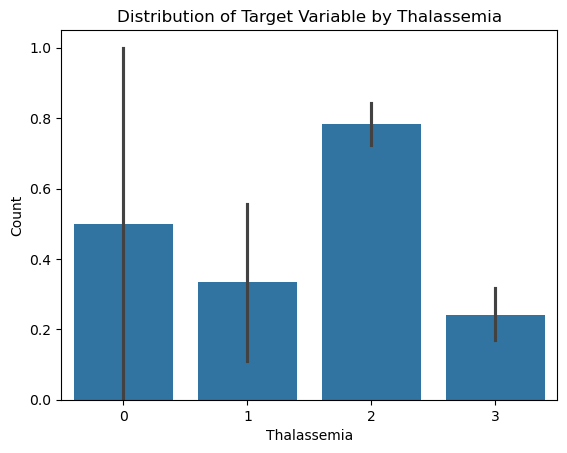

In [106]:
#sns.barplot(dataset["thal"],y)

sns.barplot(x=dataset["thal"], y=y)
plt.title('Distribution of Target Variable by Thalassemia')
plt.xlabel('Thalassemia')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='thal', ylabel='Density'>

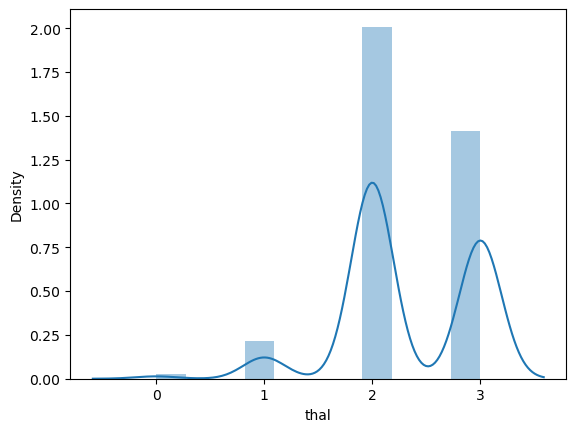

In [110]:
sns.distplot(dataset["thal"])

## IV. Train Test split

In [112]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [114]:
X_train.shape

(242, 13)

In [115]:
X_test.shape

(61, 13)

In [120]:
Y_train.shape

(242,)

In [122]:
Y_test.shape

(61,)

## V. Model Fitting

In [125]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [128]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [130]:
Y_pred_lr.shape

(61,)

In [132]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


### Naive Bayes

In [135]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [137]:
Y_pred_nb.shape

(61,)

In [139]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


### SVM

In [142]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [143]:
Y_pred_svm.shape

(61,)

In [144]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


### K Nearest Neighbors

In [146]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [147]:
Y_pred_knn.shape

(61,)

In [149]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


### Decision Tree

In [156]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [157]:
print(Y_pred_dt.shape)

(61,)


In [158]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [ ]:
Y_pred_rf.shape

In [ ]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

In [ ]:
!pip install xgboost

### XGBoost

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
Y_pred_xgb.shape

In [ ]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Linear SVM is: 81.97 %
The accuracy score achieved using KNN is: 67.21 %
The accuracy score achieved using Decision Tree is: 81.97 %
